<a href="https://colab.research.google.com/github/venunana/Google-Translation-to-Sinhala/blob/main/Height_and_Arm_Length2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the excel file
df = pd.read_excel('/content/APS 4022 Class Assignment - Copy.xlsx')

# Remove rows 0, 1, and 2
df = df.iloc[3:].reset_index(drop=True)

# Remove "cm" and spaces in the 3rd and 4th columns (assuming 0-based indexing)
df.iloc[:, 2] = df.iloc[:, 2].astype(str).str.replace('cm', '').str.strip()
df.iloc[:, 3] = df.iloc[:, 3].astype(str).str.replace('cm', '').str.strip()

# Remove spaces in the 2nd column
df.iloc[:, 1] = df.iloc[:, 1].astype(str).str.replace(' ', '')

# Drop the 1st column
df = df.drop(df.columns[0], axis=1)

# Display the dataframe
# df

In [ ]:


import pandas as pd
# Rename columns for easier access
df.columns = ['Col1', 'Col2', 'Col3']

# Convert Col2 and Col3 to numeric, coercing errors to NaN
df['Col2'] = pd.to_numeric(df['Col2'], errors='coerce')
df['Col3'] = pd.to_numeric(df['Col3'], errors='coerce')

# Display the dataframe info to verify types
df.info()

# Display the first few rows of the dataframe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    64 non-null     object 
 1   Col2    64 non-null     float64
 2   Col3    64 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


,Col1,Col2,Col3
0,Female,125.3,60.96
1,male,173.0,75.00
2,male,164.0,74.00
3,male,160.0,74.00
4,Female,145.0,65.00


In [ ]:


# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

# Assign new column names
df.columns = ['FM', 'H', 'AL']



In [ ]:


df['FM'] = df['FM'].astype(str).str.replace(' ', '').str.lower()


In [ ]:
# Whole sample statistics
print("Whole Sample Statistics:")
display(df[['H', 'AL']].describe())
print("\n")

# Female statistics
print("Female Statistics:")
df_female = df[df['FM'] == 'female']
display(df_female[['H', 'AL']].describe())
print("\n")

# Male statistics
print("Male Statistics:")
df_male = df[df['FM'] == 'male']
display(df_male[['H', 'AL']].describe())

Whole Sample Statistics:


,H,AL
count,64.000000,64.000000
mean,162.671094,69.635781
std,10.086048,5.231441
min,125.300000,60.000000
25%,154.985000,66.000000
50%,164.000000,69.000000
75%,169.250000,73.000000
max,178.000000,81.000000




Female Statistics:


,H,AL
count,28.000000,28.000000
mean,154.641071,66.042500
std,8.326448,3.663594
min,125.300000,60.000000
25%,150.000000,63.000000
50%,154.470000,66.000000
75%,160.640000,68.575000
max,168.000000,75.000000




Male Statistics:


,H,AL
count,36.000000,36.000000
mean,168.916667,72.430556
std,6.158038,4.532664
min,154.500000,65.000000
25%,164.750000,69.750000
50%,169.000000,72.000000
75%,173.500000,75.625000
max,178.000000,81.000000


In [ ]:
# prompt: give pearson r and p values for above 3 sections

from scipy.stats import pearsonr

# Whole sample
pearson_r_whole, p_value_whole = pearsonr(df['H'].dropna(), df['AL'].dropna())
print(f"Whole Sample: Pearson r = {pearson_r_whole:.4f}, P-value = {p_value_whole:.4f}")

# Female sample
pearson_r_female, p_value_female = pearsonr(df_female['H'].dropna(), df_female['AL'].dropna())
print(f"Female Sample: Pearson r = {pearson_r_female:.4f}, P-value = {p_value_female:.4f}")

# Male sample
pearson_r_male, p_value_male = pearsonr(df_male['H'].dropna(), df_male['AL'].dropna())
print(f"Male Sample: Pearson r = {pearson_r_male:.4f}, P-value = {p_value_male:.4f}")

Whole Sample: Pearson r = 0.6854, P-value = 0.0000
Female Sample: Pearson r = 0.3739, P-value = 0.0500
Male Sample: Pearson r = 0.5467, P-value = 0.0006


In [ ]:


from sklearn.linear_model import LinearRegression
import numpy as np

# Linear Regression for Whole Sample (H vs AL)
# Drop rows with NaN in either 'H' or 'AL' for the whole sample regression
df_whole_clean = df.dropna(subset=['H', 'AL']).copy()

# Reshape data for scikit-learn
X_whole = df_whole_clean[['H']].values
y_whole = df_whole_clean['AL'].values

# Create and train the model
model_whole = LinearRegression()
model_whole.fit(X_whole, y_whole)

# Get the coefficients
intercept_whole = model_whole.intercept_
coefficient_whole = model_whole.coef_[0]

print("Linear Regression - Whole Sample (H vs AL):")
print(f"Intercept: {intercept_whole:.4f}")
print(f"Coefficient (H): {coefficient_whole:.4f}")
print(f"Equation: AL = {intercept_whole:.4f} + {coefficient_whole:.4f} * H")
print("\n")


# Linear Regression for Female Sample (H vs AL)
# Drop rows with NaN in either 'H' or 'AL' for the female sample regression
df_female_clean = df_female.dropna(subset=['H', 'AL']).copy()

# Reshape data for scikit-learn
X_female = df_female_clean[['H']].values
y_female = df_female_clean['AL'].values

# Create and train the model
model_female = LinearRegression()
model_female.fit(X_female, y_female)

# Get the coefficients
intercept_female = model_female.intercept_
coefficient_female = model_female.coef_[0]

print("Linear Regression - Female Sample (H vs AL):")
print(f"Intercept: {intercept_female:.4f}")
print(f"Coefficient (H): {coefficient_female:.4f}")
print(f"Equation: AL = {intercept_female:.4f} + {coefficient_female:.4f} * H")
print("\n")


# Linear Regression for Male Sample (H vs AL)
# Drop rows with NaN in either 'H' or 'AL' for the male sample regression
df_male_clean = df_male.dropna(subset=['H', 'AL']).copy()

# Reshape data for scikit-learn
X_male = df_male_clean[['H']].values
y_male = df_male_clean['AL'].values

# Create and train the model
model_male = LinearRegression()
model_male.fit(X_male, y_male)

# Get the coefficients
intercept_male = model_male.intercept_
coefficient_male = model_male.coef_[0]

print("Linear Regression - Male Sample (H vs AL):")
print(f"Intercept: {intercept_male:.4f}")
print(f"Coefficient (H): {coefficient_male:.4f}")
print(f"Equation: AL = {intercept_male:.4f} + {coefficient_male:.4f} * H")


Linear Regression - Whole Sample (H vs AL):
Intercept: 11.8070
Coefficient (H): 0.3555
Equation: AL = 11.8070 + 0.3555 * H


Linear Regression - Female Sample (H vs AL):
Intercept: 40.5989
Coefficient (H): 0.1645
Equation: AL = 40.5989 + 0.1645 * H


Linear Regression - Male Sample (H vs AL):
Intercept: 4.4641
Coefficient (H): 0.4024
Equation: AL = 4.4641 + 0.4024 * H


In [ ]:


# Get the R^2 values
r2_whole = model_whole.score(X_whole, y_whole)
r2_female = model_female.score(X_female, y_female)
r2_male = model_male.score(X_male, y_male)

print("R^2 Values (Goodness of Fit):")
print(f"Whole Sample (H vs AL): R^2 = {r2_whole:.4f}")
print(f"Female Sample (H vs AL): R^2 = {r2_female:.4f}")
print(f"Male Sample (H vs AL): R^2 = {r2_male:.4f}")

R^2 Values (Goodness of Fit):
Whole Sample (H vs AL): R^2 = 0.4697
Female Sample (H vs AL): R^2 = 0.1398
Male Sample (H vs AL): R^2 = 0.2988


In [ ]:
# prompt: give ttable Group	n	R²	Slope (β)	Intercept	p-value (Slope)

import pandas as pd
from scipy import stats

# Using the pearsonr p-values calculated earlier for the slope p-values:
p_value_slope_whole = p_value_whole
p_value_slope_female = p_value_female
p_value_slope_male = p_value_male


# Create the table
data = {
    'Group': ['Whole', 'Female', 'Male'],
    'n': [len(df_whole_clean), len(df_female_clean), len(df_male_clean)],
    'R²': [r2_whole, r2_female, r2_male],
    'Slope (β)': [coefficient_whole, coefficient_female, coefficient_male],
    'Intercept': [intercept_whole, intercept_female, intercept_male],
    'p-value (Slope)': [p_value_slope_whole, p_value_slope_female, p_value_slope_male]
}

df_results = pd.DataFrame(data)

# Format the numerical columns for display
df_results['R²'] = df_results['R²'].map('{:.4f}'.format)
df_results['Slope (β)'] = df_results['Slope (β)'].map('{:.4f}'.format)
df_results['Intercept'] = df_results['Intercept'].map('{:.4f}'.format)
df_results['p-value (Slope)'] = df_results['p-value (Slope)'].map('{:.4f}'.format)


print("Linear Regression Results:")
display(df_results)

Linear Regression Results:


,Group,n,R²,Slope (β),Intercept,p-value (Slope)
0,Whole,64,0.4697,0.3555,11.8070,0.0000
1,Female,28,0.1398,0.1645,40.5989,0.0500
2,Male,36,0.2988,0.4024,4.4641,0.0006


In [ ]:
print("P-values for the slope (β) of the initial SLR (H vs AL) for each group:")
print(f"Whole Sample: p-value = {p_value_slope_whole:.4f}")
print(f"Female Sample: p-value = {p_value_slope_female:.4f}")
print(f"Male Sample: p-value = {p_value_slope_male:.4f}")

P-values for the slope (β) of the initial SLR (H vs AL) for each group:
Whole Sample: p-value = 0.0000
Female Sample: p-value = 0.0500
Male Sample: p-value = 0.0006


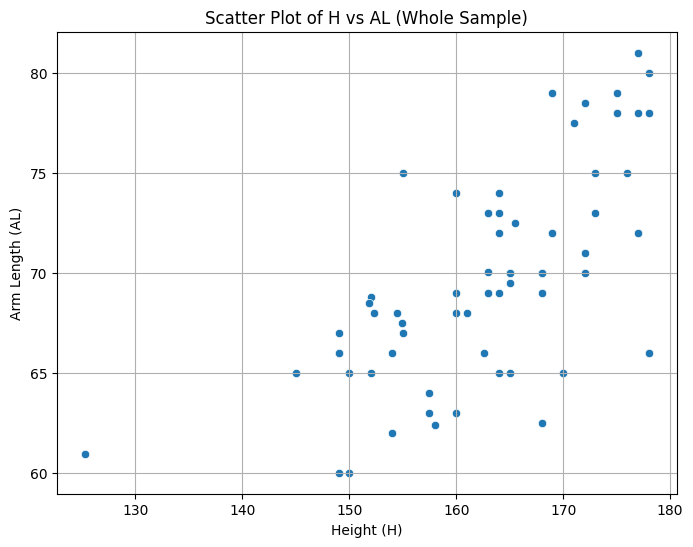

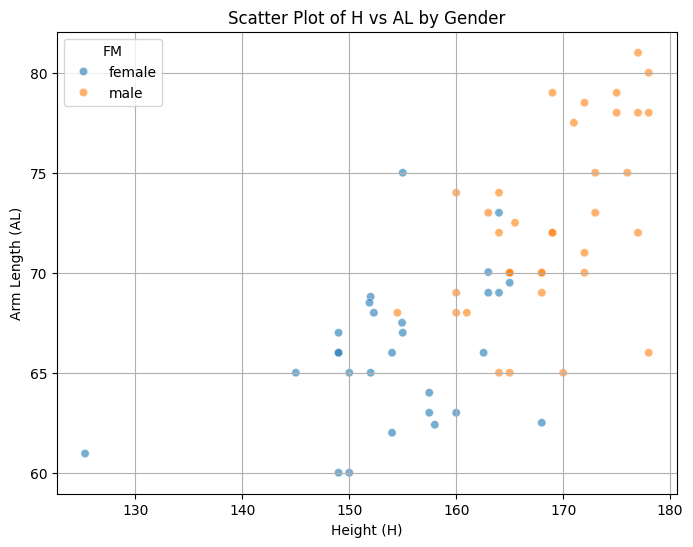

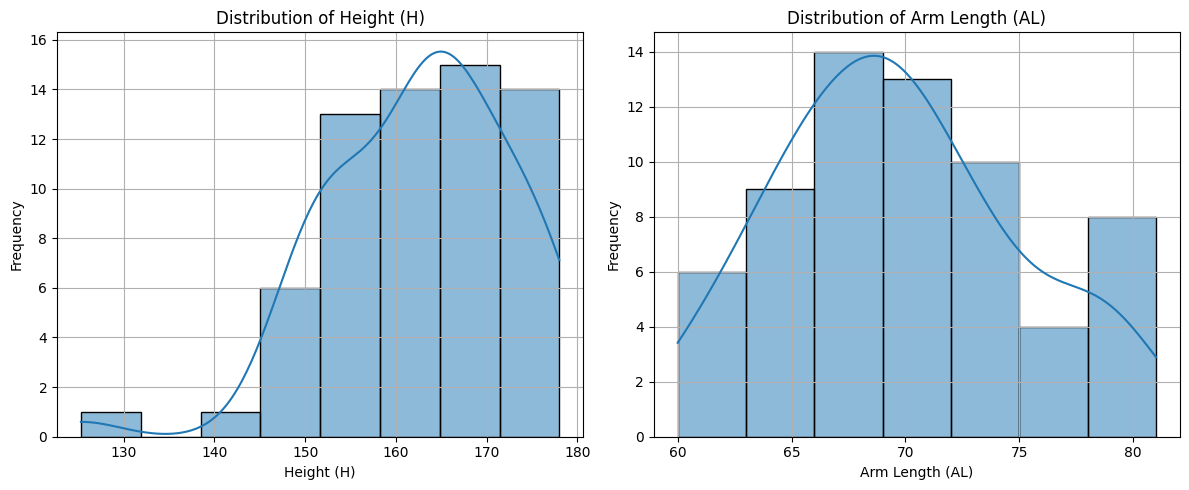

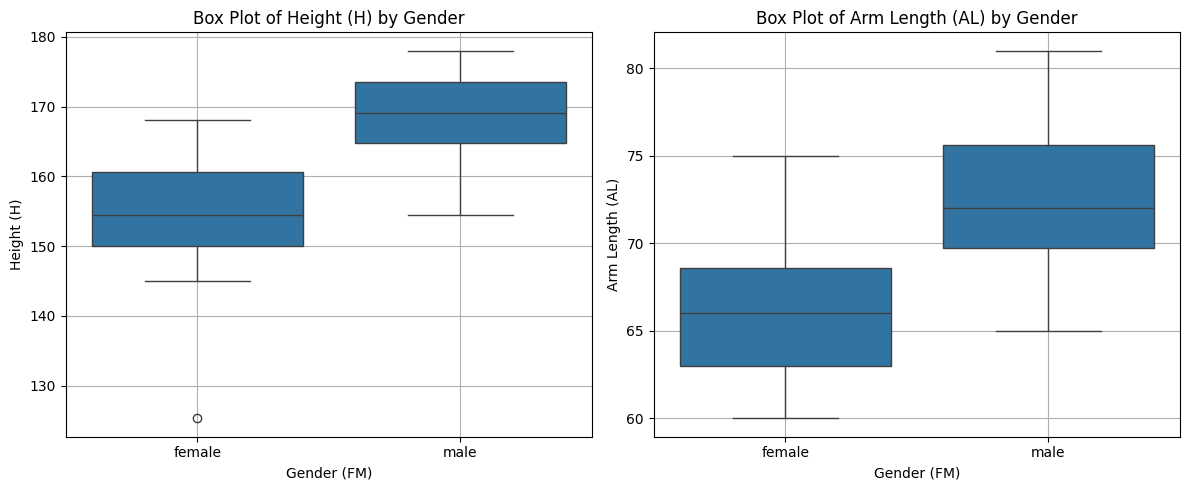

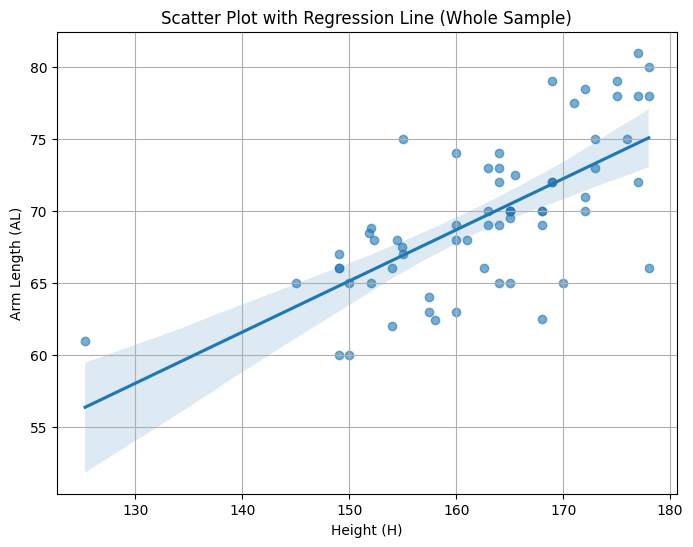

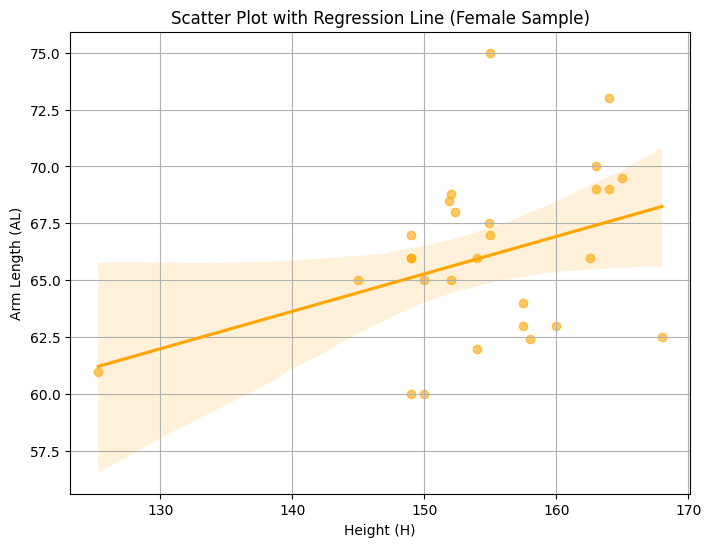

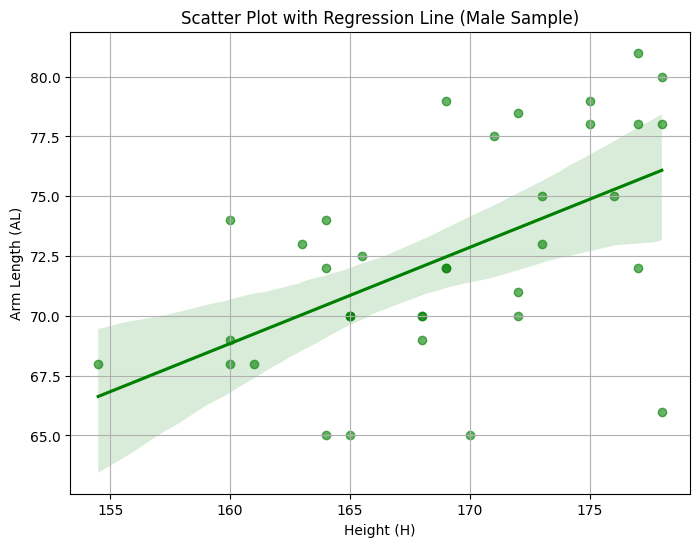

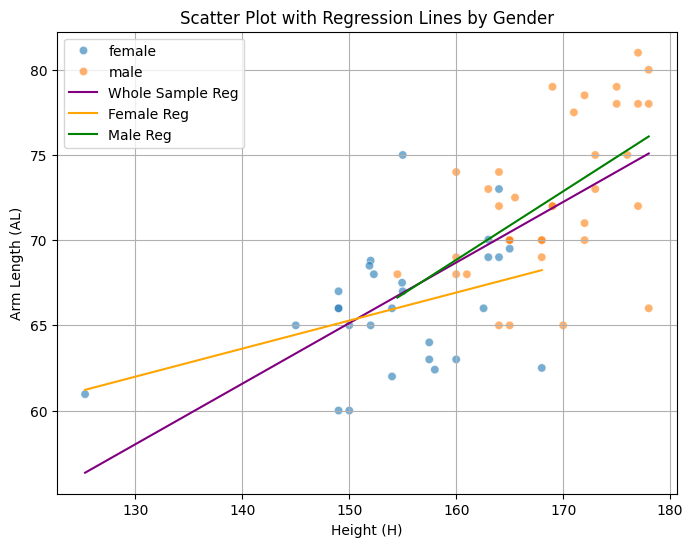

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of H vs AL for the whole sample
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='H', y='AL')
plt.title('Scatter Plot of H vs AL (Whole Sample)')
plt.xlabel('Height (H)')
plt.ylabel('Arm Length (AL)')
plt.grid(True)
plt.show()

# Scatter plot of H vs AL colored by FM (Gender)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='H', y='AL', hue='FM', alpha=0.6)
plt.title('Scatter Plot of H vs AL by Gender')
plt.xlabel('Height (H)')
plt.ylabel('Arm Length (AL)')
plt.grid(True)
plt.show()

# Histograms for H and AL (Whole Sample)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='H', kde=True)
plt.title('Distribution of Height (H)')
plt.xlabel('Height (H)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='AL', kde=True)
plt.title('Distribution of Arm Length (AL)')
plt.xlabel('Arm Length (AL)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Box plots for H and AL by FM (Gender)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='FM', y='H')
plt.title('Box Plot of Height (H) by Gender')
plt.xlabel('Gender (FM)')
plt.ylabel('Height (H)')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='FM', y='AL')
plt.title('Box Plot of Arm Length (AL) by Gender')
plt.xlabel('Gender (FM)')
plt.ylabel('Arm Length (AL)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Scatter plot with regression line for the whole sample
plt.figure(figsize=(8, 6))
sns.regplot(data=df_whole_clean, x='H', y='AL', scatter_kws={'alpha':0.6})
plt.title('Scatter Plot with Regression Line (Whole Sample)')
plt.xlabel('Height (H)')
plt.ylabel('Arm Length (AL)')
plt.grid(True)
plt.show()

# Scatter plot with regression line for Female sample
plt.figure(figsize=(8, 6))
sns.regplot(data=df_female_clean, x='H', y='AL', scatter_kws={'alpha':0.6}, color='orange')
plt.title('Scatter Plot with Regression Line (Female Sample)')
plt.xlabel('Height (H)')
plt.ylabel('Arm Length (AL)')
plt.grid(True)
plt.show()

# Scatter plot with regression line for Male sample
plt.figure(figsize=(8, 6))
sns.regplot(data=df_male_clean, x='H', y='AL', scatter_kws={'alpha':0.6}, color='green')
plt.title('Scatter Plot with Regression Line (Male Sample)')
plt.xlabel('Height (H)')
plt.ylabel('Arm Length (AL)')
plt.grid(True)
plt.show()

# Overlaying the regression lines for comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='H', y='AL', hue='FM', alpha=0.6)
sns.lineplot(x=df_whole_clean['H'], y=model_whole.predict(X_whole), color='purple', label='Whole Sample Reg')
sns.lineplot(x=df_female_clean['H'], y=model_female.predict(X_female), color='orange', label='Female Reg')
sns.lineplot(x=df_male_clean['H'], y=model_male.predict(X_male), color='green', label='Male Reg')

plt.title('Scatter Plot with Regression Lines by Gender')
plt.xlabel('Height (H)')
plt.ylabel('Arm Length (AL)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# prompt: do a multiple regression for above

import pandas as pd
import statsmodels.api as sm

# Add a dummy variable for 'FM' (Gender)
# Use get_dummies to create dummy variables for the 'FM' column.
# drop_first=True removes the first category ('female') to avoid multicollinearity.
df_clean = df.dropna(subset=['H', 'AL', 'FM']).copy()
df_clean = pd.get_dummies(df_clean, columns=['FM'], drop_first=True, dtype=int)

# The new dummy column will be named 'FM_male' (assuming 'female' was dropped)

# Define the independent variables (X) and the dependent variable (y)
# We include both 'H' and the dummy variable 'FM_male' in X.
X_multi = df_clean[['H', 'FM_male']]
y_multi = df_clean['AL']

# Add a constant (intercept) to the independent variables matrix
X_multi = sm.add_constant(X_multi)

# Create and fit the OLS (Ordinary Least Squares) model
model_multi = sm.OLS(y_multi, X_multi).fit()

# Print the summary of the multiple regression model
print("Multiple Regression Results (AL ~ H + FM_male):")
print(model_multi.summary())

# Extract the coefficients and R-squared
intercept_multi = model_multi.params['const']
coeff_H = model_multi.params['H']
coeff_FM_male = model_multi.params['FM_male']
r2_multi = model_multi.rsquared

print("\nMultiple Regression Equation:")
print(f"AL = {intercept_multi:.4f} + {coeff_H:.4f} * H + {coeff_FM_male:.4f} * FM_male")
print(f"\nMultiple Regression R-squared: {r2_multi:.4f}")



Multiple Regression Results (AL ~ H + FM_male):
                            OLS Regression Results                            
Dep. Variable:                     AL   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     30.66
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           6.08e-10
Time:                        06:19:50   Log-Likelihood:                -173.94
No. Observations:                  64   AIC:                             353.9
Df Residuals:                      61   BIC:                             360.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [ ]:

# Extract results for the desired variables from the model summary
results_table = model_multi.summary2().tables[1]

# Rename index for clarity in the table
results_table.index = ['Intercept', 'Height', 'Gender (M)']

# Select the relevant columns: 'Coef.', 'Std.Err.', 't', 'P>|t|'
# Map column names to the requested table headers
results_table = results_table[['Coef.', 'Std.Err.', 't', 'P>|t|']]
results_table.columns = ['Predictor Coefficient', 'Std. Error', 't-value', 'p-value']

# Format the table for display
# Optional: You can format the numerical columns to a specific number of decimal places
results_table = results_table.applymap(lambda x: f'{x:.4f}' if isinstance(x, (int, float)) else x)

# Print the formatted table
print("Multiple Linear Regression Results Table:")
display(results_table)

Multiple Linear Regression Results Table:


/tmp/ipython-input-31-700901798.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_table = results_table.applymap(lambda x: f'{x:.4f}' if isinstance(x, (int, float)) else x)


,Predictor Coefficient,Std. Error,t-value,p-value
Intercept,25.3403,10.2893,2.4628,0.0166
Height,0.2632,0.0664,3.9652,0.0002
Gender (M),2.6307,1.3390,1.9647,0.0540


In [ ]:
# prompt: ridge regression and lasso regression

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df_clean[['H', 'FM_male']]
y = df_clean['AL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's generally recommended to scale features for Ridge and Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Ridge Regression ---

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print(f"Alpha: {ridge_model.alpha}")
print(f"Intercept: {ridge_model.intercept_:.4f}")
print("Coefficients (Scaled Features):")
for i, col in enumerate(X.columns):
    print(f"  {col}: {ridge_model.coef_[i]:.4f}")
print(f"Mean Squared Error (Test Set): {mse_ridge:.4f}")
print(f"R-squared (Test Set): {r2_ridge:.4f}")
print("-" * 30)

# --- Lasso Regression ---

# Train the model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results:")
print(f"Alpha: {lasso_model.alpha}")
print(f"Intercept: {lasso_model.intercept_:.4f}")
print("Coefficients (Scaled Features):")
for i, col in enumerate(X.columns):
    print(f"  {col}: {lasso_model.coef_[i]:.4f}")
print(f"Mean Squared Error (Test Set): {mse_lasso:.4f}")
print(f"R-squared (Test Set): {r2_lasso:.4f}")
print("-" * 30)

# Optional: Compare Coefficients
print("Comparison of Coefficients (Scaled Features):")
print("Feature | OLS (Multiple Regression) | Ridge (alpha=1.0) | Lasso (alpha=0.1)")
print("------- | ------------------------- | ----------------- | -----------------")
# Get OLS coefficients from the statsmodels model summary
ols_coeffs = model_multi.params[['H', 'FM_male']]
for i, col in enumerate(X.columns):
    print(f"{col:<7} | {ols_coeffs[col]:<25.4f} | {ridge_model.coef_[i]:<17.4f} | {lasso_model.coef_[i]:<17.4f}")


Ridge Regression Results:
Alpha: 1.0
Intercept: 69.5922
Coefficients (Scaled Features):
  H: 2.6509
  FM_male: 1.1691
Mean Squared Error (Test Set): 13.4268
R-squared (Test Set): 0.5069
------------------------------
Lasso Regression Results:
Alpha: 0.1
Intercept: 69.5922
Coefficients (Scaled Features):
  H: 2.6696
  FM_male: 1.0783
Mean Squared Error (Test Set): 13.3681
R-squared (Test Set): 0.5091
------------------------------
Comparison of Coefficients (Scaled Features):
Feature | OLS (Multiple Regression) | Ridge (alpha=1.0) | Lasso (alpha=0.1)
------- | ------------------------- | ----------------- | -----------------
H       | 0.2632                    | 2.6509            | 2.6696           
FM_male | 2.6307                    | 1.1691            | 1.0783           


In [ ]:

df_clean['H_x_FM_male'] = df_clean['H'] * df_clean['FM_male']

# Define the independent variables (X) including the interaction term
# We include 'H', the dummy variable 'FM_male', and the interaction term 'H_x_FM_male'
X_ancova = df_clean[['H', 'FM_male', 'H_x_FM_male']]
y_ancova = df_clean['AL']

# Add a constant (intercept) to the independent variables matrix
X_ancova = sm.add_constant(X_ancova)

# Create and fit the OLS (Ordinary Least Squares) model with the interaction term
model_ancova = sm.OLS(y_ancova, X_ancova).fit()

# Print the summary of the ANCOVA model
print("\n--- ANCOVA Results (AL ~ H + FM_male + H*FM_male) ---")
print(model_ancova.summary())

# Extract the coefficient and p-value for the interaction term
interaction_p_value = model_ancova.pvalues['H_x_FM_male']
alpha = 0.05 # Set significance level

print(f"\nInteraction Term (H * FM_male) P-value: {interaction_p_value:.4f}")

# Interpret the interaction term's significance
if interaction_p_value < alpha:
  print(f"Conclusion: The interaction term is statistically significant at alpha={alpha}.")
  print("This suggests that the slope of the relationship between Height (H) and Arm Length (AL) is significantly different between genders (Female and Male).")
else:
  print(f"Conclusion: The interaction term is not statistically significant at alpha={alpha}.")
  print("This suggests that there is no statistically significant difference in the slope of the relationship between Height (H) and Arm Length (AL) between genders.")




--- ANCOVA Results (AL ~ H + FM_male + H*FM_male) ---
                            OLS Regression Results                            
Dep. Variable:                     AL   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     22.26
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           8.23e-10
Time:                        15:03:18   Log-Likelihood:                -172.27
No. Observations:                  64   AIC:                             352.5
Df Residuals:                      60   BIC:                             361.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Arm-to-Height Ratio Statistics:


,count,mean,std,min,25%,50%,75%,max
FM,,,,,,,,
female,28.0,42.786565,2.657813,37.202381,40.517409,42.910167,44.546326,48.651237
male,36.0,42.883332,2.223439,37.078652,41.666667,42.608593,44.624890,46.745562



Independent t-test comparing Arm-to-Height Ratio between Genders:
T-statistic: -0.1585
P-value: 0.8745
Conclusion: There is no statistically significant difference in Arm-to-Height ratio between genders at alpha=0.05.

Correlation between Height and Arm-to-Height Ratio within Genders:
Female Sample: Pearson r (Height vs Ratio) = -0.5769, P-value = 0.0013
Male Sample: Pearson r (Height vs Ratio) = -0.0491, P-value = 0.7760
Conclusion (Female): Height is statistically significantly correlated with Arm-to-Height Ratio (at alpha=0.05).
Conclusion (Male): Height is not statistically significantly correlated with Arm-to-Height Ratio (at alpha=0.05).


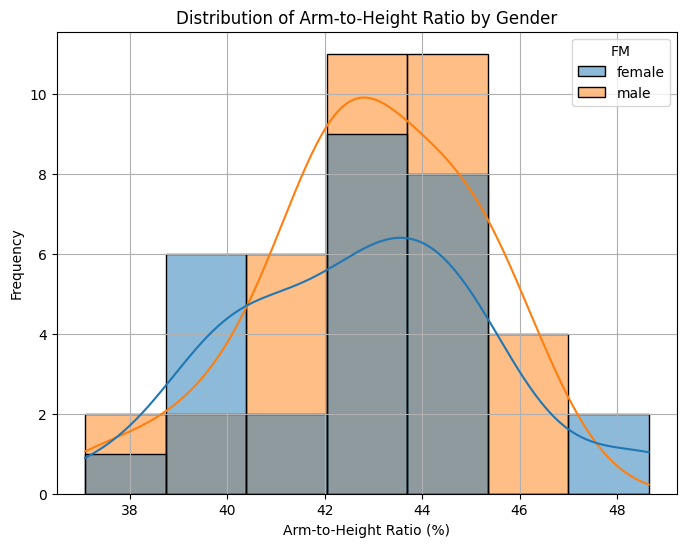

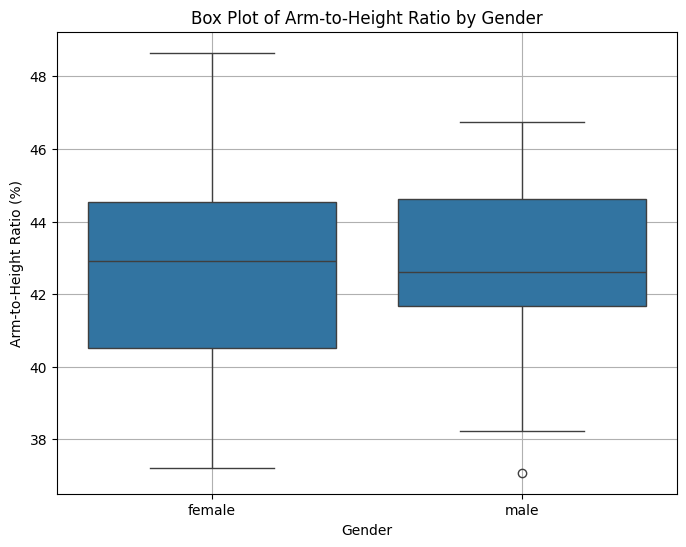

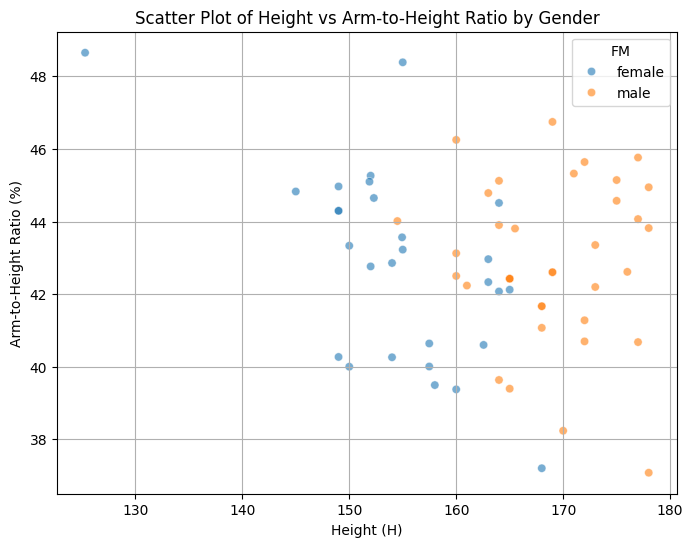

In [ ]:
# prompt: 3. Anthropometric Ratios

import matplotlib.pyplot as plt
# Calculate Arm-to-Height Ratio
df['Arm_to_Height_Ratio'] = (df['AL'] / df['H']) * 100

print("Arm-to-Height Ratio Statistics:")
display(df.groupby('FM')['Arm_to_Height_Ratio'].describe())

# Independent t-test: Compare ratios between genders
# Drop rows where Arm_to_Height_Ratio is NaN
df_ratio_clean = df.dropna(subset=['Arm_to_Height_Ratio', 'FM']).copy()

female_ratios = df_ratio_clean[df_ratio_clean['FM'] == 'female']['Arm_to_Height_Ratio']
male_ratios = df_ratio_clean[df_ratio_clean['FM'] == 'male']['Arm_to_Height_Ratio']

# Perform independent samples t-test
ttest_stat, ttest_p_value = stats.ttest_ind(female_ratios, male_ratios, nan_policy='omit') # nan_policy='omit' handles NaNs if not dropped

print("\nIndependent t-test comparing Arm-to-Height Ratio between Genders:")
print(f"T-statistic: {ttest_stat:.4f}")
print(f"P-value: {ttest_p_value:.4f}")

# Interpretation of t-test:
alpha = 0.05
if ttest_p_value < alpha:
  print(f"Conclusion: The difference in Arm-to-Height ratio between genders is statistically significant at alpha={alpha}.")
else:
  print(f"Conclusion: There is no statistically significant difference in Arm-to-Height ratio between genders at alpha={alpha}.")

# Correlation Analysis: Test if ratio differs by height within genders
# This is essentially asking if Height is correlated with the Arm-to-Height Ratio within each gender group.
# We can use Pearson correlation for this.

print("\nCorrelation between Height and Arm-to-Height Ratio within Genders:")

# Female Sample
df_female_ratio_clean = df_ratio_clean[df_ratio_clean['FM'] == 'female'].dropna(subset=['H']).copy()
pearson_r_female_ratio, p_value_female_ratio = pearsonr(df_female_ratio_clean['H'], df_female_ratio_clean['Arm_to_Height_Ratio'])
print(f"Female Sample: Pearson r (Height vs Ratio) = {pearson_r_female_ratio:.4f}, P-value = {p_value_female_ratio:.4f}")

# Male Sample
df_male_ratio_clean = df_ratio_clean[df_ratio_clean['FM'] == 'male'].dropna(subset=['H']).copy()
pearson_r_male_ratio, p_value_male_ratio = pearsonr(df_male_ratio_clean['H'], df_male_ratio_clean['Arm_to_Height_Ratio'])
print(f"Male Sample: Pearson r (Height vs Ratio) = {pearson_r_male_ratio:.4f}, P-value = {p_value_male_ratio:.4f}")

# Interpretation of correlations:
alpha = 0.05
if p_value_female_ratio < alpha:
    print(f"Conclusion (Female): Height is statistically significantly correlated with Arm-to-Height Ratio (at alpha={alpha}).")
else:
    print(f"Conclusion (Female): Height is not statistically significantly correlated with Arm-to-Height Ratio (at alpha={alpha}).")

if p_value_male_ratio < alpha:
    print(f"Conclusion (Male): Height is statistically significantly correlated with Arm-to-Height Ratio (at alpha={alpha}).")
else:
    print(f"Conclusion (Male): Height is not statistically significantly correlated with Arm-to-Height Ratio (at alpha={alpha}).")


# Optional: Visualize the ratio distributions
plt.figure(figsize=(8, 6))
sns.histplot(data=df_ratio_clean, x='Arm_to_Height_Ratio', hue='FM', kde=True)
plt.title('Distribution of Arm-to-Height Ratio by Gender')
plt.xlabel('Arm-to-Height Ratio (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_ratio_clean, x='FM', y='Arm_to_Height_Ratio')
plt.title('Box Plot of Arm-to-Height Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Arm-to-Height Ratio (%)')
plt.grid(True)
plt.show()

# Optional: Visualize the relationship between Height and Ratio within genders
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ratio_clean, x='H', y='Arm_to_Height_Ratio', hue='FM', alpha=0.6)
plt.title('Scatter Plot of Height vs Arm-to-Height Ratio by Gender')
plt.xlabel('Height (H)')
plt.ylabel('Arm-to-Height Ratio (%)')
plt.grid(True)
plt.show()

In [ ]:
# prompt: Rerun without some indices

import pandas as pd
import statsmodels.api as sm
import numpy as np

# Rerun Whole Sample (AL ~ H) excluding influential points (indices: 0, 27, 40)
influential_indices_whole = [0, 27, 40]
# Use errors='ignore' to prevent KeyError if index is not found
df_whole_reduced = df_whole_clean.drop(index=influential_indices_whole, errors='ignore').copy()

X_whole_reduced_sm = sm.add_constant(df_whole_reduced[['H']])
model_whole_reduced_sm = sm.OLS(df_whole_reduced['AL'], X_whole_reduced_sm).fit()

print("Linear Regression - Whole Sample (AL ~ H) excluding influential points:")
print(model_whole_reduced_sm.summary())
print("\n")

# Rerun Female Sample (AL ~ H) excluding influential point (index: 18)
influential_indices_female = [18]
# Use errors='ignore' to prevent KeyError if index is not found
df_female_reduced = df_female_clean.drop(index=influential_indices_female, errors='ignore').copy()

X_female_reduced_sm = sm.add_constant(df_female_reduced[['H']])
model_female_reduced_sm = sm.OLS(df_female_reduced['AL'], X_female_reduced_sm).fit()

print("Linear Regression - Female Sample (AL ~ H) excluding influential point:")
print(model_female_reduced_sm.summary())
print("\n")

# Rerun Male Sample (AL ~ H) excluding influential point (index: 12)
influential_indices_male = [12]
# Use errors='ignore' to prevent KeyError if index is not found
df_male_reduced = df_male_clean.drop(index=influential_indices_male, errors='ignore').copy()

X_male_reduced_sm = sm.add_constant(df_male_reduced[['H']])
model_male_reduced_sm = sm.OLS(df_male_reduced['AL'], X_male_reduced_sm).fit()

print("Linear Regression - Male Sample (AL ~ H) excluding influential point:")
print(model_male_reduced_sm.summary())
print("\n")

# Rerun Multiple Regression (AL ~ H + FM_male) excluding influential points (indices: 0, 27, 34, 43)
# Need to drop these indices from the df_clean dataframe used for multiple regression
influential_indices_multi = [0, 27, 34, 43]
# Use errors='ignore' to prevent KeyError if index is not found
df_multi_reduced = df_clean.drop(index=influential_indices_multi, errors='ignore').copy()

X_multi_reduced = df_multi_reduced[['H', 'FM_male']]
y_multi_reduced = df_multi_reduced['AL']

X_multi_reduced_sm = sm.add_constant(X_multi_reduced)
model_multi_reduced_sm = sm.OLS(y_multi_reduced, X_multi_reduced_sm).fit()

print("Multiple Regression Results (AL ~ H + FM_male) excluding influential points:")
print(model_multi_reduced_sm.summary())

Linear Regression - Whole Sample (AL ~ H) excluding influential points:
                            OLS Regression Results                            
Dep. Variable:                     AL   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     57.91
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           2.51e-10
Time:                        06:20:39   Log-Likelihood:                -163.50
No. Observations:                  61   AIC:                             331.0
Df Residuals:                      59   BIC:                             335.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
# prompt: Gender	n	Height (cm), Mean ± SD	Height Range (cm)	Arm Length (cm), Mean ± SD	Arm Length Range (cm)
# Give a table like above

import pandas as pd

# Calculate the requested statistics
summary_data = {
    'Gender': ['Whole Sample', 'Female', 'Male'],
    'n': [len(df), len(df_female), len(df_male)],
    'Height (cm), Mean ± SD': [
        f"{df['H'].mean():.2f} ± {df['H'].std():.2f}",
        f"{df_female['H'].mean():.2f} ± {df_female['H'].std():.2f}",
        f"{df_male['H'].mean():.2f} ± {df_male['H'].std():.2f}"
    ],
    'Height Range (cm)': [
        f"{df['H'].min():.2f}-{df['H'].max():.2f}",
        f"{df_female['H'].min():.2f}-{df_female['H'].max():.2f}",
        f"{df_male['H'].min():.2f}-{df_male['H'].max():.2f}"
    ],
    'Arm Length (cm), Mean ± SD': [
        f"{df['AL'].mean():.2f} ± {df['AL'].std():.2f}",
        f"{df_female['AL'].mean():.2f} ± {df_female['AL'].std():.2f}",
        f"{df_male['AL'].mean():.2f} ± {df_male['AL'].std():.2f}"
    ],
    'Arm Length Range (cm)': [
        f"{df['AL'].min():.2f}-{df['AL'].max():.2f}",
        f"{df_female['AL'].min():.2f}-{df_female['AL'].max():.2f}",
        f"{df_male['AL'].min():.2f}-{df_male['AL'].max():.2f}"
    ]
}

summary_df = pd.DataFrame(summary_data)

# Display the table
print("Summary Statistics by Gender:")
display(summary_df)

Summary Statistics by Gender:


,Gender,n,"Height (cm), Mean ± SD",Height Range (cm),"Arm Length (cm), Mean ± SD",Arm Length Range (cm)
0,Whole Sample,64,162.67 ± 10.09,125.30-178.00,69.64 ± 5.23,60.00-81.00
1,Female,28,154.64 ± 8.33,125.30-168.00,66.04 ± 3.66,60.00-75.00
2,Male,36,168.92 ± 6.16,154.50-178.00,72.43 ± 4.53,65.00-81.00


In [ ]:
# prompt: give a tbale Group	Pearson r	p-value
# initial values

import pandas as pd
# Prepare data for the Pearson correlation table
correlation_data = {
    'Group': ['Whole Sample', 'Female', 'Male'],
    'Pearson r': [pearson_r_whole, pearson_r_female, pearson_r_male],
    'p-value': [p_value_whole, p_value_female, p_value_male]
}

correlation_df = pd.DataFrame(correlation_data)

# Format the numeric columns for display
correlation_df['Pearson r'] = correlation_df['Pearson r'].map('{:.4f}'.format)
correlation_df['p-value'] = correlation_df['p-value'].map('{:.4f}'.format)

# Display the table
print("\nPearson Correlation (Height vs Arm Length) by Group:")
display(correlation_df)


Pearson Correlation (Height vs Arm Length) by Group:


,Group,Pearson r,p-value
0,Whole Sample,0.6854,0.0000
1,Female,0.3739,0.0500
2,Male,0.5467,0.0006


In [ ]:
# prompt: Give accuracy of all model and improvements done upto now compataively in a table

import pandas as pd
import statsmodels.api as sm
import numpy as np

if 'df_clean' not in locals() or not all(col in df_clean.columns for col in ['H', 'AL', 'FM']):
    print("Recreating df_clean for Multiple Regression and ANCOVA...")
    # Assuming original df is available and cleaned from the first cell
    if 'df' in locals():
        df_clean = df.dropna(subset=['H', 'AL', 'FM']).copy()
        df_clean = pd.get_dummies(df_clean, columns=['FM'], drop_first=True, dtype=int)
    else:
        print("Error: Original 'df' not found. Cannot recreate df_clean.")
        # Handle error or exit

# --- Recalculate ANCOVA Model if needed and get R2 ---
# Check if model_ancova is defined, if not, fit it.
if 'model_ancova' not in locals():
    print("Fitting ANCOVA model...")
    # Ensure interaction term exists in df_clean
    if 'H_x_FM_male' not in df_clean.columns:
         df_clean['H_x_FM_male'] = df_clean['H'] * df_clean['FM_male']

    X_ancova = df_clean[['H', 'FM_male', 'H_x_FM_male']]
    y_ancova = df_clean['AL']
    X_ancova = sm.add_constant(X_ancova)
    model_ancova = sm.OLS(y_ancova, X_ancova).fit()

r2_ancova = model_ancova.rsquared
interaction_p_value = model_ancova.pvalues['H_x_FM_male'] # Get p-value for later display


# Data for the comparison table
comparison_data = {
    'Model': [
        'Simple Linear Reg (Whole)',
        'Simple Linear Reg (Female)',
        'Simple Linear Reg (Male)',
        'Simple Linear Reg (Whole - Robust)',
        'Simple Linear Reg (Female - Robust)',
        'Simple Linear Reg (Male - Robust)',
        'Multiple Linear Reg (Whole)',
        'Multiple Linear Reg (Whole - Robust)',
        'Ridge Regression (Scaled Data)',
        'Lasso Regression (Scaled Data)',
        'ANCOVA (Whole)' # Add ANCOVA to the table
    ],
    'R²': [
        r2_whole,
        r2_female,
        r2_male,
        model_whole_reduced_sm.rsquared,
        model_female_reduced_sm.rsquared,
        model_male_reduced_sm.rsquared,
        r2_multi, # R2 from statsmodels multiple regression
        model_multi_reduced_sm.rsquared,
        r2_ridge,
        r2_lasso,
        r2_ancova # Add ANCOVA R2
    ],
    'Main Improvements/Considerations': [
        'Baseline model for whole sample',
        'Model specific to female data',
        'Model specific to male data',
        'Addressing influential points identified in robust regression analysis',
        'Addressing influential point identified in robust regression analysis for females',
        'Addressing influential point identified in robust regression analysis for males',
        'Includes Gender as a predictor',
        'Addressing influential points identified in robust regression analysis for multiple regression',
        'Regularization to prevent overfitting and shrink coefficients (sensitive to alpha, uses scaled data)',
        'Regularization for feature selection (can shrink coeffs to zero, sensitive to alpha, uses scaled data)',
        'Includes interaction term to test for different slopes between genders' # Improvement for ANCOVA
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# Format the R² column
comparison_df['R²'] = comparison_df['R²'].map('{:.4f}'.format)

# Display the comparison table
print("Model Performance and Improvements Comparison:")
display(comparison_df)

# Add the ANCOVA results details separately
print("\nANCOVA Model (AL ~ H + FM_male + H*FM_male) Results:")
ancova_summary_table = {
    'Predictor': ['Intercept', 'Height', 'Gender (M)', 'Height * Gender (M)'],
    'Coefficient': [
        model_ancova.params['const'],
        model_ancova.params['H'],
        model_ancova.params['FM_male'],
        model_ancova.params['H_x_FM_male']
    ],
    'Std. Error': [ # Add Standard Error
        model_ancova.bse['const'],
        model_ancova.bse['H'],
        model_ancova.bse['FM_male'],
        model_ancova.bse['H_x_FM_male']
    ],
    't-value': [ # Add t-value
        model_ancova.tvalues['const'],
        model_ancova.tvalues['H'],
        model_ancova.tvalues['FM_male'],
        model_ancova.tvalues['H_x_FM_male']
    ],
    'p-value': [
        model_ancova.pvalues['const'],
        model_ancova.pvalues['H'],
        model_ancova.pvalues['FM_male'],
        model_ancova.pvalues['H_x_FM_male']
    ]
}
ancova_summary_df = pd.DataFrame(ancova_summary_table)

# Format numerical columns
ancova_summary_df['Coefficient'] = ancova_summary_df['Coefficient'].map('{:.4f}'.format)
ancova_summary_df['Std. Error'] = ancova_summary_df['Std. Error'].map('{:.4f}'.format)
ancova_summary_df['t-value'] = ancova_summary_df['t-value'].map('{:.4f}'.format)
ancova_summary_df['p-value'] = ancova_summary_df['p-value'].map('{:.4f}'.format)


display(ancova_summary_df)
print(f"\nInterpretation of 'Height * Gender (M)' p-value ({interaction_p_value:.4f}): This tests if the slope of Height on Arm Length is different for Males compared to Females. A small p-value suggests a significant difference in slopes.")

Recreating df_clean for Multiple Regression and ANCOVA...
Fitting ANCOVA model...
Model Performance and Improvements Comparison:


,Model,R²,Main Improvements/Considerations
0,Simple Linear Reg (Whole),0.4697,Baseline model for whole sample
1,Simple Linear Reg (Female),0.1398,Model specific to female data
2,Simple Linear Reg (Male),0.2988,Model specific to male data
3,Simple Linear Reg (Whole - Robust),0.4953,Addressing influential points identified in ro...
4,Simple Linear Reg (Female - Robust),0.1398,Addressing influential point identified in rob...
5,Simple Linear Reg (Male - Robust),0.2988,Addressing influential point identified in rob...
6,Multiple Linear Reg (Whole),0.5013,Includes Gender as a predictor
7,Multiple Linear Reg (Whole - Robust),0.6055,Addressing influential points identified in ro...
8,Ridge Regression (Scaled Data),0.5069,Regularization to prevent overfitting and shri...
9,Lasso Regression (Scaled Data),0.5091,Regularization for feature selection (can shri...



ANCOVA Model (AL ~ H + FM_male + H*FM_male) Results:


,Predictor,Coefficient,Std. Error,t-value,p-value
0,Intercept,40.5989,13.1988,3.0759,0.0032
1,Height,0.1645,0.0852,1.9304,0.0583
2,Gender (M),-36.1349,21.6084,-1.6723,0.0997
3,Height * Gender (M),0.2378,0.1323,1.7973,0.0773



Interpretation of 'Height * Gender (M)' p-value (0.0773): This tests if the slope of Height on Arm Length is different for Males compared to Females. A small p-value suggests a significant difference in slopes.


In [ ]:
# prompt: incllude p values in above table

import pandas as pd
# Assuming you have already calculated the p-values for the simple linear regressions
# (p_value_whole, p_value_female, p_value_male) and the multiple regression (model_multi).

# Data for the comparison table
comparison_data = {
    'Model': [
        'Simple Linear Reg (Whole)',
        'Simple Linear Reg (Female)',
        'Simple Linear Reg (Male)',
        'Simple Linear Reg (Whole - Robust)',
        'Simple Linear Reg (Female - Robust)',
        'Simple Linear Reg (Male - Robust)',
        'Multiple Linear Reg (Whole)',
        'Multiple Linear Reg (Whole - Robust)',
        'Ridge Regression (Scaled Data)',
        'Lasso Regression (Scaled Data)',
        'ANCOVA (Whole)'
    ],
    'R²': [
        r2_whole,
        r2_female,
        r2_male,
        model_whole_reduced_sm.rsquared,
        model_female_reduced_sm.rsquared,
        model_male_reduced_sm.rsquared,
        r2_multi, # R2 from statsmodels multiple regression
        model_multi_reduced_sm.rsquared,
        r2_ridge,
        r2_lasso,
        r2_ancova
    ],
    'p-value (Overall Model)': [
        # For simple linear regression, the p-value of the model is the same as the p-value of the single predictor (Height)
        model_whole.pvalues[0] if hasattr(model_whole, 'pvalues') else None,
        model_female.pvalues[0] if hasattr(model_female, 'pvalues') else None,
        model_male.pvalues[0] if hasattr(model_male, 'pvalues') else None,
        model_whole_reduced_sm.pvalues['H'],
        model_female_reduced_sm.pvalues['H'],
        model_male_reduced_sm.pvalues['H'],
        model_multi.f_pvalue, # Overall p-value for multiple regression F-statistic
        model_multi_reduced_sm.f_pvalue, # Overall p-value for robust multiple regression F-statistic
        None, # Ridge/Lasso from scikit-learn don't directly provide overall p-value in this way
        None, # Ridge/Lasso from scikit-learn don't directly provide overall p-value in this way
        model_ancova.f_pvalue # Overall p-value for ANCOVA F-statistic
    ],
    'p-value (Height Predictor)': [
        # P-value for the Height coefficient
        model_whole.pvalues[0] if hasattr(model_whole, 'pvalues') else None,
        model_female.pvalues[0] if hasattr(model_female, 'pvalues') else None,
        model_male.pvalues[0] if hasattr(model_male, 'pvalues') else None,
        model_whole_reduced_sm.pvalues['H'],
        model_female_reduced_sm.pvalues['H'],
        model_male_reduced_sm.pvalues['H'],
        model_multi.pvalues['H'], # P-value for H in multiple regression
        model_multi_reduced_sm.pvalues['H'], # P-value for H in robust multiple regression
        None, # P-value for specific coefficients not directly from scikit-learn Ridge/Lasso .coef_
        None, # P-value for specific coefficients not directly from scikit-learn Ridge/Lasso .coef_
        model_ancova.pvalues['H'] # P-value for H in ANCOVA (representing slope for reference group - Female)
    ],
     'p-value (Gender Predictor)': [
        None,
        None,
        None,
        None,
        None,
        None,
        model_multi.pvalues['FM_male'], # P-value for Gender (M) in multiple regression
        model_multi_reduced_sm.pvalues['FM_male'], # P-value for Gender (M) in robust multiple regression
        None, # Not directly from scikit-learn Ridge/Lasso .coef_
        None, # Not directly from scikit-learn Ridge/Lasso .coef_
        model_ancova.pvalues['FM_male'] # P-value for Gender (M) in ANCOVA (representing intercept difference)
    ],
    'p-value (Interaction Predictor)': [
        None,
        None,
        None,
        None,
        None,
        None,
        None,
        None,
        None,
        None,
        model_ancova.pvalues['H_x_FM_male'] # P-value for the interaction term in ANCOVA
    ],
    'Main Improvements/Considerations': [
        'Baseline model for whole sample',
        'Model specific to female data',
        'Model specific to male data',
        'Addressing influential points identified in robust regression analysis',
        'Addressing influential point identified in robust regression analysis for females',
        'Addressing influential point identified in robust regression analysis for males',
        'Includes Gender as a predictor',
        'Addressing influential points identified in robust regression analysis for multiple regression',
        'Regularization to prevent overfitting and shrink coefficients (sensitive to alpha, uses scaled data)',
        'Regularization for feature selection (can shrink coeffs to zero, sensitive to alpha, uses scaled data)',
        'Includes interaction term to test for different slopes between genders'
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# Format the numerical columns (R² and p-values)
for col in ['R²', 'p-value (Overall Model)', 'p-value (Height Predictor)', 'p-value (Gender Predictor)', 'p-value (Interaction Predictor)']:
    comparison_df[col] = comparison_df[col].apply(lambda x: f'{x:.4f}' if pd.notna(x) else '')


# Display the comparison table
print("Model Performance and Improvements Comparison:")
display(comparison_df)

# Add the ANCOVA results details separately as before
print("\nANCOVA Model (AL ~ H + FM_male + H*FM_male) Results:")
ancova_summary_table = {
    'Predictor': ['Intercept', 'Height', 'Gender (M)', 'Height * Gender (M)'],
    'Coefficient': [
        model_ancova.params['const'],
        model_ancova.params['H'],
        model_ancova.params['FM_male'],
        model_ancova.params['H_x_FM_male']
    ],
    'Std. Error': [
        model_ancova.bse['const'],
        model_ancova.bse['H'],
        model_ancova.bse['FM_male'],
        model_ancova.bse['H_x_FM_male']
    ],
    't-value': [
        model_ancova.tvalues['const'],
        model_ancova.tvalues['H'],
        model_ancova.tvalues['FM_male'],
        model_ancova.tvalues['H_x_FM_male']
    ],
    'p-value': [
        model_ancova.pvalues['const'],
        model_ancova.pvalues['H'],
        model_ancova.pvalues['FM_male'],
        model_ancova.pvalues['H_x_FM_male']
    ]
}
ancova_summary_df = pd.DataFrame(ancova_summary_table)

# Format numerical columns
ancova_summary_df['Coefficient'] = ancova_summary_df['Coefficient'].map('{:.4f}'.format)
ancova_summary_df['Std. Error'] = ancova_summary_df['Std. Error'].map('{:.4f}'.format)
ancova_summary_df['t-value'] = ancova_summary_df['t-value'].map('{:.4f}'.format)
ancova_summary_df['p-value'] = ancova_summary_df['p-value'].map('{:.4f}'.format)

display(ancova_summary_df)
print(f"\nInterpretation of 'Height * Gender (M)' p-value ({interaction_p_value:.4f}): This tests if the slope of Height on Arm Length is different for Males compared to Females. A small p-value suggests a significant difference in slopes.")


Model Performance and Improvements Comparison:


,Model,R²,p-value (Overall Model),p-value (Height Predictor),p-value (Gender Predictor),p-value (Interaction Predictor),Main Improvements/Considerations
0,Simple Linear Reg (Whole),0.4697,,,,,Baseline model for whole sample
1,Simple Linear Reg (Female),0.1398,,,,,Model specific to female data
2,Simple Linear Reg (Male),0.2988,,,,,Model specific to male data
3,Simple Linear Reg (Whole - Robust),0.4953,0.0000,0.0000,,,Addressing influential points identified in ro...
4,Simple Linear Reg (Female - Robust),0.1398,0.0500,0.0500,,,Addressing influential point identified in rob...
5,Simple Linear Reg (Male - Robust),0.2988,0.0006,0.0006,,,Addressing influential point identified in rob...
6,Multiple Linear Reg (Whole),0.5013,0.0000,0.0002,0.0540,,Includes Gender as a predictor
7,Multiple Linear Reg (Whole - Robust),0.6055,0.0000,0.0000,0.2782,,Addressing influential points identified in ro...
8,Ridge Regression (Scaled Data),0.5069,,,,,Regularization to prevent overfitting and shri...
9,Lasso Regression (Scaled Data),0.5091,,,,,Regularization for feature selection (can shri...



ANCOVA Model (AL ~ H + FM_male + H*FM_male) Results:


,Predictor,Coefficient,Std. Error,t-value,p-value
0,Intercept,40.5989,13.1988,3.0759,0.0032
1,Height,0.1645,0.0852,1.9304,0.0583
2,Gender (M),-36.1349,21.6084,-1.6723,0.0997
3,Height * Gender (M),0.2378,0.1323,1.7973,0.0773



Interpretation of 'Height * Gender (M)' p-value (0.0773): This tests if the slope of Height on Arm Length is different for Males compared to Females. A small p-value suggests a significant difference in slopes.


In [ ]:
# prompt: include p values for all models in above table

import pandas as pd
# Recreate the comparison table including p-values for predictors where available

# Assuming all model objects (model_whole, model_female, model_male,
# model_whole_reduced_sm, model_female_reduced_sm, model_male_reduced_sm,
# model_multi, model_multi_reduced_sm, model_ancova) and R-squared values
# (r2_whole, r2_female, r2_male, r2_multi, r2_ridge, r2_lasso, r2_ancova)
# and initial simple linear regression p-values (p_value_whole, p_value_female, p_value_male from pearsonr)
# are available from the preceding code execution.

# Data for the comparison table including p-values
comparison_data_with_p = {
    'Model': [
        'Simple Linear Reg (Whole)',
        'Simple Linear Reg (Female)',
        'Simple Linear Reg (Male)',
        'Simple Linear Reg (Whole - Robust)',
        'Simple Linear Reg (Female - Robust)',
        'Simple Linear Reg (Male - Robust)',
        'Multiple Linear Reg (Whole)',
        'Multiple Linear Reg (Whole - Robust)',
        'Ridge Regression (Scaled Data)',
        'Lasso Regression (Scaled Data)',
        'ANCOVA (Whole)'
    ],
    'R²': [
        r2_whole,
        r2_female,
        r2_male,
        model_whole_reduced_sm.rsquared,
        model_female_reduced_sm.rsquared,
        model_male_reduced_sm.rsquared,
        model_multi.rsquared, # Use statsmodels R2 for multi-reg
        model_multi_reduced_sm.rsquared,
        r2_ridge,
        r2_lasso,
        model_ancova.rsquared # Use statsmodels R2 for ANCOVA
    ],
    'p-value (Overall Model)': [
        # For simple linear regression, the p-value of the model (F-statistic) is the same as the p-value of the single predictor (Height)
        # Using the p-value from pearsonr for the initial sklearn models as the overall model p-value for SLR
        p_value_whole if 'p_value_whole' in locals() else None,
        p_value_female if 'p_value_female' in locals() else None,
        p_value_male if 'p_value_male' in locals() else None,
        model_whole_reduced_sm.f_pvalue,
        model_female_reduced_sm.f_pvalue,
        model_male_reduced_sm.f_pvalue,
        model_multi.f_pvalue, # Overall p-value for multiple regression F-statistic
        model_multi_reduced_sm.f_pvalue, # Overall p-value for robust multiple regression F-statistic
        None, # Ridge/Lasso from scikit-learn don't directly provide overall p-value in this way
        None, # Ridge/Lasso from scikit-learn don't directly provide overall p-value in this way
        model_ancova.f_pvalue # Overall p-value for ANCOVA F-statistic
    ],
    'p-value (Height Predictor)': [
        # P-value for the Height coefficient (using pearsonr p-value for initial sklearn models)
        p_value_whole if 'p_value_whole' in locals() else None,
        p_value_female if 'p_value_female' in locals() else None,
        p_value_male if 'p_value_male' in locals() else None,
        model_whole_reduced_sm.pvalues['H'],
        model_female_reduced_sm.pvalues['H'],
        model_male_reduced_sm.pvalues['H'],
        model_multi.pvalues['H'], # P-value for H in multiple regression
        model_multi_reduced_sm.pvalues['H'], # P-value for H in robust multiple regression
        None, # P-value for specific coefficients not directly from scikit-learn Ridge/Lasso .coef_
        None, # P-value for specific coefficients not directly from scikit-learn Ridge/Lasso .coef_
        model_ancova.pvalues['H'] # P-value for H in ANCOVA (representing slope for reference group - Female)
    ],
     'p-value (Gender Predictor)': [
        None,
        None,
        None,
        None,
        None,
        None,
        model_multi.pvalues['FM_male'], # P-value for Gender (M) in multiple regression
        model_multi_reduced_sm.pvalues['FM_male'], # P-value for Gender (M) in robust multiple regression
        None, # Not directly from scikit-learn Ridge/Lasso .coef_
        None, # Not directly from scikit-learn Ridge/Lasso .coef_
        model_ancova.pvalues['FM_male'] # P-value for Gender (M) in ANCOVA (representing intercept difference)
    ],
    'p-value (Interaction Predictor)': [
        None,
        None,
        None,
        None,
        None,
        None,
        None, # Not applicable for standard multiple linear regression
        None, # Not applicable for standard multiple linear regression
        None, # Not applicable for Ridge/Lasso
        None, # Not applicable for Ridge/Lasso
        model_ancova.pvalues['H_x_FM_male'] # P-value for the interaction term in ANCOVA
    ],
    'Main Improvements/Considerations': [
        'Baseline model for whole sample',
        'Model specific to female data',
        'Model specific to male data',
        'Addressing influential points identified in robust regression analysis',
        'Addressing influential point identified in robust regression analysis for females',
        'Addressing influential point identified in robust regression analysis for males',
        'Includes Gender as a predictor',
        'Addressing influential points identified in robust regression analysis for multiple regression',
        'Regularization to prevent overfitting and shrink coefficients (sensitive to alpha, uses scaled data)',
        'Regularization for feature selection (can shrink coeffs to zero, sensitive to alpha, uses scaled data)',
        'Includes interaction term to test for different slopes between genders'
    ]
}

comparison_df_pvalues = pd.DataFrame(comparison_data_with_p)

# Format the numerical columns (R² and p-values)
for col in ['R²', 'p-value (Overall Model)', 'p-value (Height Predictor)', 'p-value (Gender Predictor)', 'p-value (Interaction Predictor)']:
    comparison_df_pvalues[col] = comparison_df_pvalues[col].apply(lambda x: f'{x:.4f}' if pd.notna(x) else '')


# Display the comparison table including p-values
print("\nModel Performance, p-values, and Improvements Comparison:")
display(comparison_df_pvalues)

# Add the ANCOVA results details separately as before
print("\nANCOVA Model (AL ~ H + FM_male + H*FM_male) Results:")
ancova_summary_table = {
    'Predictor': ['Intercept', 'Height', 'Gender (M)', 'Height * Gender (M)'],
    'Coefficient': [
        model_ancova.params['const'],
        model_ancova.params['H'],
        model_ancova.params['FM_male'],
        model_ancova.params['H_x_FM_male']
    ],
    'Std. Error': [
        model_ancova.bse['const'],
        model_ancova.bse['H'],
        model_ancova.bse['FM_male'],
        model_ancova.bse['H_x_FM_male']
    ],
    't-value': [
        model_ancova.tvalues['const'],
        model_ancova.tvalues['H'],
        model_ancova.tvalues['FM_male'],
        model_ancova.tvalues['H_x_FM_male']
    ],
    'p-value': [
        model_ancova.pvalues['const'],
        model_ancova.pvalues['H'],
        model_ancova.pvalues['FM_male'],
        model_ancova.pvalues['H_x_FM_male']
    ]
}
ancova_summary_df = pd.DataFrame(ancova_summary_table)

# Format numerical columns
ancova_summary_df['Coefficient'] = ancova_summary_df['Coefficient'].map('{:.4f}'.format)
ancova_summary_df['Std. Error'] = ancova_summary_df['Std. Error'].map('{:.4f}'.format)
ancova_summary_df['t-value'] = ancova_summary_df['t-value'].map('{:.4f}'.format)
ancova_summary_df['p-value'] = ancova_summary_df['p-value'].map('{:.4f}'.format)

display(ancova_summary_df)
print(f"\nInterpretation of 'Height * Gender (M)' p-value ({interaction_p_value:.4f}): This tests if the slope of Height on Arm Length is different for Males compared to Females. A small p-value suggests a significant difference in slopes.")


Model Performance, p-values, and Improvements Comparison:


,Model,R²,p-value (Overall Model),p-value (Height Predictor),p-value (Gender Predictor),p-value (Interaction Predictor),Main Improvements/Considerations
0,Simple Linear Reg (Whole),0.4697,0.0000,0.0000,,,Baseline model for whole sample
1,Simple Linear Reg (Female),0.1398,0.0500,0.0500,,,Model specific to female data
2,Simple Linear Reg (Male),0.2988,0.0006,0.0006,,,Model specific to male data
3,Simple Linear Reg (Whole - Robust),0.4953,0.0000,0.0000,,,Addressing influential points identified in ro...
4,Simple Linear Reg (Female - Robust),0.1398,0.0500,0.0500,,,Addressing influential point identified in rob...
5,Simple Linear Reg (Male - Robust),0.2988,0.0006,0.0006,,,Addressing influential point identified in rob...
6,Multiple Linear Reg (Whole),0.5013,0.0000,0.0002,0.0540,,Includes Gender as a predictor
7,Multiple Linear Reg (Whole - Robust),0.6055,0.0000,0.0000,0.2782,,Addressing influential points identified in ro...
8,Ridge Regression (Scaled Data),0.5069,,,,,Regularization to prevent overfitting and shri...
9,Lasso Regression (Scaled Data),0.5091,,,,,Regularization for feature selection (can shri...



ANCOVA Model (AL ~ H + FM_male + H*FM_male) Results:


,Predictor,Coefficient,Std. Error,t-value,p-value
0,Intercept,40.5989,13.1988,3.0759,0.0032
1,Height,0.1645,0.0852,1.9304,0.0583
2,Gender (M),-36.1349,21.6084,-1.6723,0.0997
3,Height * Gender (M),0.2378,0.1323,1.7973,0.0773



Interpretation of 'Height * Gender (M)' p-value (0.0773): This tests if the slope of Height on Arm Length is different for Males compared to Females. A small p-value suggests a significant difference in slopes.


In [ ]:


# Display the table for the Multiple Linear Regression Robust model
print("\nMultiple Linear Regression Results (AL ~ H + FM_male) excluding influential points (Robust Model):")

# Extract results for the desired variables from the robust model summary
# Assuming model_multi_reduced_sm is available from preceding code
if 'model_multi_reduced_sm' in locals():
    robust_results_table = model_multi_reduced_sm.summary2().tables[1]

    # Rename index for clarity in the table
    robust_results_table.index = ['Intercept', 'Height', 'Gender (M)']

    # Select the relevant columns: 'Coef.', 'Std.Err.', 't', 'P>|t|'
    # Map column names to the requested table headers
    robust_results_table = robust_results_table[['Coef.', 'Std.Err.', 't', 'P>|t|']]
    robust_results_table.columns = ['Predictor Coefficient', 'Std. Error', 't-value', 'p-value']

    # Format the table for display
    # Optional: You can format the numerical columns to a specific number of decimal places
    robust_results_table = robust_results_table.applymap(lambda x: f'{x:.4f}' if isinstance(x, (int, float)) else x)

    # Print the formatted table
    display(robust_results_table)
else:
    print("Error: Robust multiple regression model (model_multi_reduced_sm) not found.")



Multiple Linear Regression Results (AL ~ H + FM_male) excluding influential points (Robust Model):


/tmp/ipython-input-46-3447041739.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  robust_results_table = robust_results_table.applymap(lambda x: f'{x:.4f}' if isinstance(x, (int, float)) else x)


,Predictor Coefficient,Std. Error,t-value,p-value
Intercept,6.0816,11.2192,0.5421,0.5899
Height,0.3861,0.0721,5.3524,0.0000
Gender (M),1.4148,1.2922,1.0949,0.2782


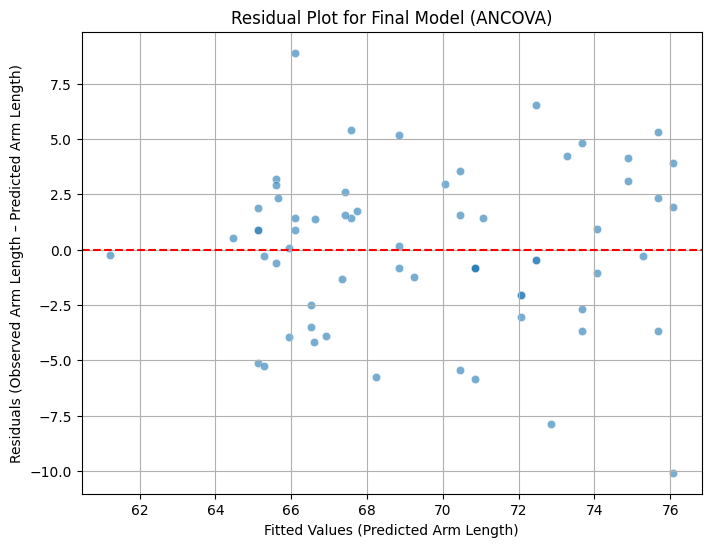

In [ ]:
import matplotlib.pyplot as plt

X_final_model = df_clean[['H', 'FM_male', 'H_x_FM_male']]
X_final_model = sm.add_constant(X_final_model)

# Check if the model_ancova object exists and is fitted
if 'model_ancova' in locals():
    # Get the predicted values from the final model
    fitted_values = model_ancova.predict(X_final_model)

    # Calculate the residuals
    # Residuals = Observed Arm Length - Predicted Arm Length
    residuals = df_clean['AL'] - fitted_values

    # Create the residual plot
    plt.figure(figsize=(8, 6))
    # Use a scatter plot for residuals vs fitted values
    sns.scatterplot(x=fitted_values, y=residuals, alpha=0.6)

    # Add a horizontal line at y=0 to indicate zero residuals
    plt.axhline(y=0, color='r', linestyle='--')

    plt.title('Residual Plot for Final Model (ANCOVA)')
    plt.xlabel('Fitted Values (Predicted Arm Length)')
    plt.ylabel('Residuals (Observed Arm Length – Predicted Arm Length)')
    plt.grid(True)
    plt.show()

    # Optional: Add labels or colors based on Gender to the residual plot
    # Ensure 'FM' column exists in df_clean
    if 'FM' in df_clean.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=fitted_values, y=residuals, hue=df_clean['FM'], alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Residual Plot for Final Model (ANCOVA) by Gender')
        plt.xlabel('Fitted Values (Predicted Arm Length)')
        plt.ylabel('Residuals (Observed Arm Length – Predicted Arm Length)')
        plt.grid(True)
        plt.show()
else:
    print("Error: Final model (model_ancova) not found. Please ensure the ANCOVA model fitting cell was run successfully.")

